---
# Segmenting and Clustering Neighborhoods in Toronto : Scraping data
---

## Import libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Scraping

In [4]:
! pip install lxml html5lib beautifulsoup4


In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
dfs = pd.read_html(url)

print(len(dfs))

3


In [7]:
dfs[0]

Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                          Neighborhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177                                       Not assigned  
178  Mimico NW, The Queensway West, South of Bloor,...  
179                                       Not assigned  

[180 rows x 3 columns]

In [10]:
df = dfs[0]
print(df.shape)
df.head()

(180, 3)


Postal Code           Borough               Neighborhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

In [18]:
df.describe(include = 'object')

Postal Code       Borough  Neighborhood
count          180           180           180
unique         180            11           100
top            M5R  Not assigned  Not assigned
freq             1            77            77

In [19]:
df['Borough'].value_counts()

Not assigned        77
North York          24
Downtown Toronto    19
Scarborough         17
Etobicoke           12
Central Toronto      9
West Toronto         6
York                 5
East York            5
East Toronto         5
Mississauga          1
Name: Borough, dtype: int64

## Delete row with *'Not assigned'* borough

In [16]:
df_valid = df[df['Borough'] != 'Not assigned']
print(df_valid.shape)
df_valid.head()

(103, 3)


Postal Code           Borough                                 Neighborhood
2         M3A        North York                                    Parkwoods
3         M4A        North York                             Victoria Village
4         M5A  Downtown Toronto                    Regent Park, Harbourfront
5         M6A        North York             Lawrence Manor, Lawrence Heights
6         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

We have now 103 rows in our DataFrame.

## Combine rows

In [20]:
df_valid.describe(include = 'object')

Postal Code     Borough Neighborhood
count          103         103          103
unique         103          10           99
top            M5R  North York    Downsview
freq             1          24            4

**Remark** : No needed, M5A appears one times.

In [21]:
df_valid[df_valid['Neighborhood'] == 'Not assigned']

Empty DataFrame
Columns: [Postal Code, Borough, Neighborhood]
Index: []

**Remark** : no cells with borough and 'Not assigned' neighborhood.

## Data Cleaning

Let's plot NAs

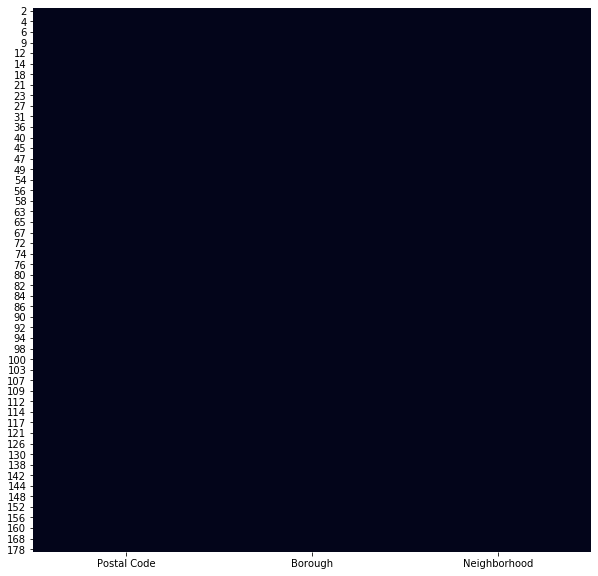

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(df_valid.isna(), cbar=False)

It's look like no NAs in our dataset

Let's count NAs

In [27]:
(df_valid.isna().sum()/df_valid.shape[0]).sort_values(ascending=True)

Postal Code     0.0
Borough         0.0
Neighborhood    0.0
dtype: float64

## Shape of clean dataset

In [28]:
df_valid.shape

(103, 3)

## Save data

In [29]:
df_valid.to_csv('df.csv')